In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install streamlit

In [3]:
import yaml
import pandas as pd
import numpy as np 
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression
# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
#import xgboost
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [5]:
##This packages are written by own in .py file inside dashboard
from dashboard import change_label
from dashboard.modeling import standardization, encode_dataframe
from dashboard import Visualization
from dashboard import DataInformation
from dashboard import show_result

In [6]:
with open("config.yaml", "r") as stream:
    cl = yaml.safe_load(stream)

In [7]:
train = cl['train']
feature = cl['feature']
test = cl['test']
test21 = cl['test21']
model_path = cl['model_path']
encoder_path = cl['encoder_path']
scaler_path = cl['scaler_path']

In [8]:
train_data=pd.read_csv(train,names=feature)

In [9]:
train_info = DataInformation(train_data)

In [10]:
train_data = train_info.drop_column("difficulty")

In [11]:
final_label_list = ['Dos','R2L','Probe','U2R']

In [12]:
for label in final_label_list:
    change_label(train_data, cl[label], label)

In [13]:
train_info_lc = DataInformation(train_data)

In [14]:
train_data['label'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [15]:
train_without_label=train_data.drop('label',axis = 1)
train_without_label

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [16]:
std_data = standardization(encode_dataframe(train_without_label.copy(), list(train_info.get_categorical_data_columns())[0:3],encoder_path), train_without_label.columns, scaler_path)                         

C:\Users\Z E P H Y R U S\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
label = encode_dataframe(pd.DataFrame(train_info_lc.get_data_label().copy()),['label'], encoder_path)


C:\Users\Z E P H Y R U S\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
svm = SVC(kernel='linear',gamma='auto')
knn = knn=KNeighborsClassifier(n_neighbors=5)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

C:\Users\Z E P H Y R U S\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,precision,recall,f1-score,support
0,0.987579,0.996145,0.991844,11414.00000
1,0.916876,0.862487,0.888850,2967.00000
2,0.778571,0.801471,0.789855,272.00000
3,0.750000,0.400000,0.521739,15.00000
4,0.970595,0.974979,0.972782,16826.00000
accuracy,0.970280,0.970280,0.970280,0.97028
macro avg,0.880724,0.807016,0.833014,31494.00000
weighted avg,0.969926,0.970280,0.969989,31494.00000


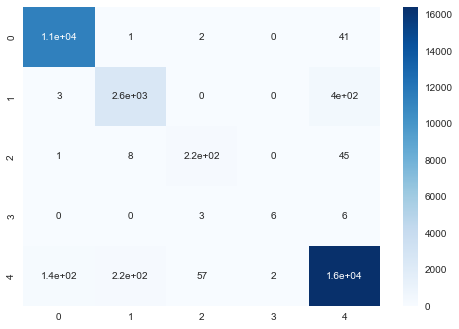

In [19]:
show_result(std_data, label, svm, model_path)

C:\Users\Z E P H Y R U S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,precision,recall,f1-score,support
0,0.998773,0.998423,0.998598,11414.000000
1,0.989865,0.987529,0.988696,2967.000000
2,0.956693,0.893382,0.923954,272.000000
3,0.700000,0.466667,0.560000,15.000000
4,0.994603,0.996612,0.995606,16826.000000
accuracy,0.995269,0.995269,0.995269,0.995269
macro avg,0.927987,0.868523,0.893371,31494.000000
weighted avg,0.995200,0.995269,0.995213,31494.000000


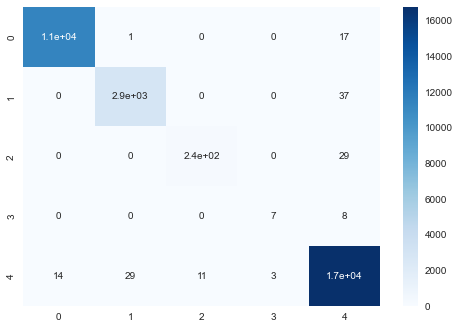

In [20]:
show_result(std_data, label, knn, model_path)

C:\Users\Z E P H Y R U S\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Z E P H Y R U S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.988066,0.993780,0.990915,11414.000000
1,0.886112,0.836535,0.860610,2967.000000
2,0.700787,0.654412,0.676806,272.000000
3,0.666667,0.400000,0.500000,15.000000
4,0.963835,0.970938,0.967373,16826.000000
accuracy,0.963549,0.963549,0.963549,0.963549
macro avg,0.841093,0.771133,0.799141,31494.000000
weighted avg,0.962881,0.963549,0.963115,31494.000000


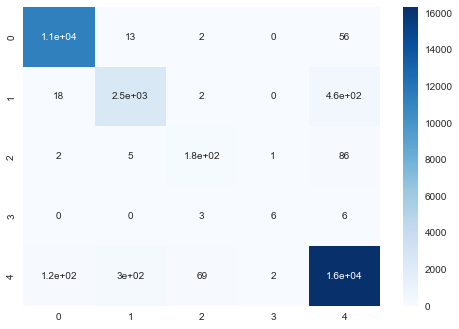

In [21]:
show_result(std_data, label, model, model_path)

In [22]:
from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier()

,precision,recall,f1-score,support
0,0.999387,0.999474,0.999431,11414.000000
1,0.994946,0.995281,0.995114,2967.000000
2,0.962264,0.937500,0.949721,272.000000
3,0.533333,0.533333,0.533333,15.000000
4,0.997742,0.998039,0.997890,16826.000000
accuracy,0.997555,0.997555,0.997555,0.997555
macro avg,0.897535,0.892726,0.895098,31494.000000
weighted avg,0.997547,0.997555,0.997550,31494.000000


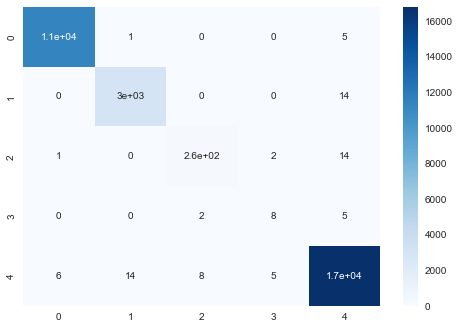

In [23]:
show_result(std_data, label, clf, model_path)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

C:\Users\Z E P H Y R U S\Projects\DDOS-detection-NSLKDD--Main\dashboard\modeling.py:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.model.fit(self.x_train, self.y_train)


,precision,recall,f1-score,support
0,0.999825,0.999737,0.999781,11414.00000
1,0.999662,0.996630,0.998143,2967.00000
2,0.996212,0.966912,0.981343,272.00000
3,0.800000,0.533333,0.640000,15.00000
4,0.998338,0.999703,0.999020,16826.00000
accuracy,0.998920,0.998920,0.998920,0.99892
macro avg,0.958807,0.899263,0.923658,31494.00000
weighted avg,0.998889,0.998920,0.998890,31494.00000


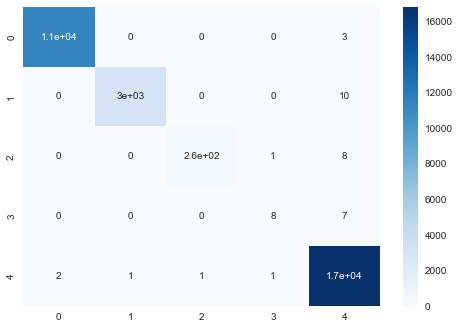

In [25]:
show_result(std_data, label, rf, model_path)

C:\Users\Z E P H Y R U S\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,precision,recall,f1-score,support
0,0.999299,0.999825,0.999562,11414.000000
1,0.998985,0.994944,0.996960,2967.000000
2,0.981273,0.963235,0.972171,272.000000
3,0.875000,0.466667,0.608696,15.000000
4,0.998041,0.999109,0.998574,16826.000000
accuracy,0.998412,0.998412,0.998412,0.998412
macro avg,0.970520,0.884756,0.915193,31494.000000
weighted avg,0.998383,0.998412,0.998367,31494.000000


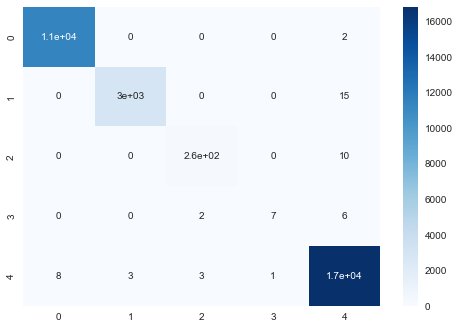

In [26]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[('rf', rf), ('dt', clf), ('SVM', svm)], voting='hard')
show_result(std_data, label, ensemble_model, model_path)